# Second Home Assignment

**Alunos:**
    Pedro Oliveira (52754), Rodrigo Ferreira (51032), Rui Roque (57588)

### 0.1. Importação das bibliotecas

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.metrics import explained_variance_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### 0.2. Importação dos Dados

In [7]:
df = pd.read_csv("superconduct/train.csv")
df.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,wtd_std_Density,mean_ElectronAffinity,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,53.622535,775.425,1010.268571,718.152900,938.016780,1.305967,0.791488,810.6,735.985714,323.811808,355.562967,160.25,105.514286,136.126003,84.528423,1.259244,1.207040,205,42.914286,75.237540,69.235569,4654.35725,2961.502286,724.953211,53.543811,1.033129,0.814598,8958.571,1579.583429,3306.162897,3572.596624,81.8375,111.727143,60.123179,99.414682,1.159687,0.787382,127.05,80.987143,51.433712,42.558396,6.9055,3.846857,3.479475,1.040986,1.088575,0.994998,12.878,1.744571,4.599064,4.666920,107.756645,61.015189,7.062488,0.621979,0.308148,0.262848,399.97342,57.127669,168.854244,138.517163,2.25,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,53.979870,766.440,1010.612857,720.605511,938.745413,1.544145,0.807078,810.6,743.164286,290.183029,354.963511,161.20,104.971429,141.465215,84.370167,1.508328,1.204115,205,50.571429,67.321319,68.008817,5821.48580,3021.016571,1237.095080,54.095718,1.314442,0.914802,10488.571,1667.383429,3767.403176,3632.649185,90.8900,112.316429,69.833315,101.166398,1.427997,0.838666,127.05,81.207857,49.438167,41.667621,7.7844,3.796857,4.403790,1.035251,1.374977,1.073094,12.878,1.595714,4.473363,4.603000,172.205316,61.372331,16.064228,0.619735,0.847404,0.567706,429.97342,51.413383,198.554600,139.630922,2.00,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,53.656268,775.425,1010.820000,718.152900,939.009036,1.305967,0.773620,810.6,743.164286,323.811808,354.804183,160.25,104.685714,136.126003,84.214573,1.259244,1.132547,205,49.314286,75.237540,67.797712,4654.35725,2999.159429,724.953211,53.974022,1.033129,0.760305,8958.571,1667.383429,3306.162897,3592.019281,81.8375,112.213571,60.123179,101.082152,1.159687,0.786007,127.05,81.207857,51.433712,41.639878,6.9055,3.822571,3.479475,1.037439,1.088575,0.927479,12.878,1.757143,4.599064,4.649635,107.756645,60.943760,7.062488,0.619095,0.308148,0.250477,399.97342,57.127669,168.854244,138.540613,2.25,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,53.639405,775.425,1

### 0.3. Pré-processamento dos Dados

Verificação da existência de valores nulos no conjunto de dados:

In [8]:
pd.isnull(df).sum().max()

0

### 1.0. Objetivo 1 - Identificação das features mais importantes

Separação do conjunto de dados em features (X) e target (y) e foi definida uma função que avalia os modelos RandomForestRegressor, DecisionTreeRegressor, LinearRegression e GradientBoostingRegressor (problema de regressão pelo facto de a target class não ser discreta mas sim contínua) de acordo com a variância explicada, de maneira a medir a discrepância entre cada um destes modelos e os dados:

In [9]:
df_array = np.array(df)
col_names = np.array(df.columns)

X = df_array[:, :-1]
y = df_array[:, -1]

features = col_names[:-1]
target = col_names[-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
N,M = X_train.shape #N = number of samples, M = number of columns

def modelTesting(X_train, X_test, y_train, y_test):
    rfr = RandomForestRegressor(n_jobs=-1,random_state=0) #default n_estimators: 100
    rfr.fit(X_train, y_train)

    dtr = DecisionTreeRegressor(random_state=0)
    dtr.fit(X_train, y_train)

    lmr = LinearRegression()
    lmr.fit(X_train, y_train)
    
    gbr=GradientBoostingRegressor(random_state=0)
    gbr.fit(X_train, y_train)
    
    rf_preds=rfr.predict(X_test)
    dt_preds=dtr.predict(X_test)
    lr_preds=lmr.predict(X_test)
    gb_preds=gbr.predict(X_test)

    vrf=explained_variance_score(y_test, rf_preds)
    vdt=explained_variance_score(y_test, dt_preds)
    vlr=explained_variance_score(y_test, lr_preds)
    vgb=explained_variance_score(y_test, gb_preds)
    return vrf,vdt,vlr,vgb

rf,dt,lr,gb=modelTesting(X_train, X_test, y_train, y_test)
print("RVE RFs: %7.4f" % rf)
print("RVE DTs: %7.4f" % dt)
print("RVE LRs: %7.4f" % lr)
print("RVE GBs: %7.4f" % gb)

RVE RFs:  0.9180
RVE DTs:  0.8743
RVE LRs:  0.7374
RVE GBs:  0.8601


Para a seleção das features mais importantes obtou-se pela utilização do modelo Random Forest.

Ordenação das features por ordem descendente da sua importância:

In [10]:
rfr = RandomForestRegressor(random_state=0, n_jobs=-1)
rfr.fit(X_train, y_train)

feature_importances={'indexs':[],'importances':[]}
for index, i in enumerate(rfr.feature_importances_):
    feature_importances['indexs'].append(index)
    feature_importances['importances'].append(i)
importances_df=pd.DataFrame(feature_importances)
importances_df=importances_df.sort_values(by=['importances'],ascending=False).reset_index(drop = True)
importances_df.head()

,indexs,importances
0,67,0.537363
1,64,0.126767
2,9,0.026802
3,80,0.020792
4,74,0.015610


De forma a podermos visualizar o impacto das features, construímos um gráfico para avaliar o impacto de cada feature nos resultados dos modelos RandomForestRegressor, DecisionTreeRegressor, LinearRegression e GradientBoostingRegressor.

In [11]:
a = importances_df['importances'][:2]
type(a)
rf_results=list()
dt_results=list()
lr_results=list()
gb_results=list()
for i in range(1,len(importances_df['indexs'])+1):
    best_cols=importances_df['indexs'][:i].tolist()
    res=modelTesting(X_train[:,best_cols], X_test[:,best_cols], y_train, y_test)
    rf_results.append(res[0])
    dt_results.append(res[1])
    lr_results.append(res[2])
    gb_results.append(res[3])
    #print(importances_df['indexs'][:i].tolist())

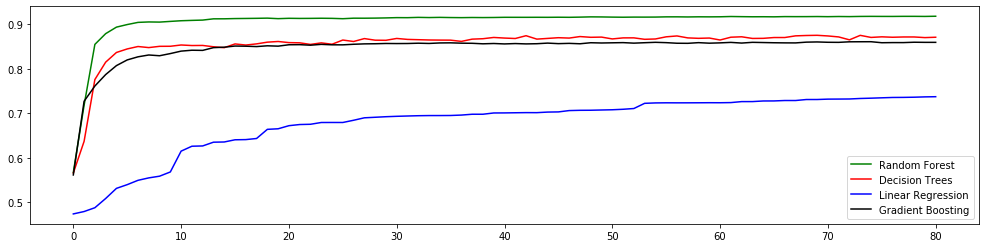

In [12]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=[17,4])
ax.plot(rf_results, color = 'green', label = 'Random Forest')
ax.plot(dt_results, color = 'red', label = 'Decision Trees')
ax.plot(lr_results, color = 'blue', label = 'Linear Regression')
ax.plot(gb_results, color = 'black', label = 'Gradient Boosting')
ax.legend(loc = 'lower right')
plt.show()

No gráfico podemos observar que no intervalo entre o 15 e o 20 não é percetível nenhuma variação no resultado do modelo RandomForestRegressor, que é o modelo com melhores resultados. Apesar de termos dado maior importância ao RandomForestRegressor, também verificamos que não havia grandes variações nos resultados dos outros modelos.

O número de variáveis escolhido foi de 18. Agora obtemos os resultados dos modelos com utilizando estas 18 features e imprimimos os seus indíces.

In [13]:
nX_train=X_train[:,importances_df['indexs'][:i].tolist()[:18]]
nX_test=X_test[:,importances_df['indexs'][:i].tolist()[:18]]
rf,dt,lr,gb=modelTesting(nX_train, nX_test, y_train, y_test)
print("Selected Features:\n", importances_df['indexs'][:i].tolist()[:18], "\n")
print("RVE RFs: %7.4f" % rf)
print("RVE DTs: %7.4f" % dt)
print("RVE LRs: %7.4f" % lr)
print("RVE GBs: %7.4f" % gb)

Selected Features:
 [67, 64, 9, 80, 74, 66, 43, 31, 72, 50, 70, 10, 35, 27, 36, 2, 18, 8] 

RVE RFs:  0.9137
RVE DTs:  0.8563
RVE LRs:  0.6435
RVE GBs:  0.8502


Pelos resultados obtidos, utilizando apenas 1 features, é possível verificar que os valores continuam semelhantes aos obtidos com 82 features, sendo a maior diferença no modelo linear passando dos 0.7374 para 0.6435 e a menor diferença na RandomForest com o valor a passar dos 0.9180 para os 00.9136

Devido a estas pequenas diferenças na variância explicada é possível uma redução acentuada no número de features do conjunto de dados.

### 2.0. Objetivo 2 - Redução de dimensionalidade

Devido à grande variedade de escalas dos valores existentes em cada features foi feita de seguida a estandardização dos dados de treino e teste separadamente:

In [14]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Agora escolhemos o número de componentes que vamos utilizar, para tal decidimos escolher o número de componentes a partir das quais obtivéssemos 0.95 da variância explicada.

In [15]:
pca = PCA(n_components=len(features))
pca.fit(X_train_scaled)
evr_sum=list()
components95=None
for index,value in enumerate(pca.explained_variance_ratio_):
    if index==0:
        evr_sum.append(value)
    else:
        if value+evr_sum[-1]>=0.95 and components95==None:
            components95=index
            print(index)
        evr_sum.append(value+evr_sum[-1])

16


In [16]:
pca = PCA(n_components=components95)
pca.fit(X_train_scaled)
nX_train_scaled=pca.transform(X_train_scaled)
nX_test_scaled=pca.transform(X_test_scaled)
rf,dt,lr,gb=modelTesting(nX_train_scaled, nX_test_scaled, y_train, y_test)
print("RVE RFs: %7.4f" % rf)
print("RVE DTs: %7.4f" % dt)
print("RVE LRs: %7.4f" % lr)
print("RVE GBs: %7.4f" % gb)

RVE RFs:  0.9065
RVE DTs:  0.8426
RVE LRs:  0.5945
RVE GBs:  0.8023


Utilizando o PCA, a diferença de variância explicada em relação à obtida inicialmente com todas as features continua a não ser muita, apesar disso e em comparação com as obtidas utilizando a random forest os resultados obtidos pioraram em todos os modelos.

### 3.0. Objetivo 3 - Identificação do melhor modelo com as features anteriormente selecionadas:

Como referido anteriormente, devido a tratar-se de um problema de regressão apenas foram utilizados modelos de regressão tais como: Linear Regression, Decision Tree Regressor, Random Forest Regressor, AdaBoost Regressor e por fim o Gradient Boosting Regressor.

In [17]:
nX=X[:,importances_df['indexs'][:i].tolist()[:18]]

De forma a avaliar os modelos foi criada uma função que de acordo com o modelo e os parâmetros dados calcula a variância explicada, assim como o RMSE do modelo utilizando o gridsearch com o parâmetro cv = 5, que retorna uma tabela com os resultados do modelo para diferentes valores dos parâmetros:

In [32]:
def evaluateModel(model, params, X_train, y_train, modelName, numberOfParams):
    scoring = ["explained_variance", "neg_root_mean_squared_error"]
    grid_cv = GridSearchCV(estimator= model, param_grid= params, scoring = scoring,cv=5, refit="explained_variance", n_jobs=-1).fit(X_train, y_train)
    results = pd.DataFrame(grid_cv.cv_results_)
    #print(results)

    if(numberOfParams == 2):
        results = results.iloc[:, [4,5,6,12,-3]]
    elif(numberOfParams == 0):
        results = results.iloc[:, [4,10,-3]]
    elif(numberOfParams == 3):
        results = results.iloc[:, [4,5,6,7,13,-3]]

    #add a column with the model Name
    n = results.shape[0]
    mn = []
    for i in range(n):
        mn.append(modelName)
    results.insert(0, "Model", mn, True)
    
    return results

Formatação das tabelas que serão construídas para guardar os scores de cada modelo:

In [19]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)

### 3.1. Linear Regression

Para este modelo apenas foi avaliado utilizando os valores default em todos os seus parâmetros.

In [30]:
params = [{}]

nParams = len(params[0])

linearResults = evaluateModel(LinearRegression(), params, nX, y, "Linear Regression", nParams)
linearResults

,Model,params,mean_test_explained_variance,mean_test_neg_root_mean_squared_error
0,Linear Regression,{},0.017732,-21.352081


### 3.2. Decision Trees

In [33]:
params = [{"max_depth": [None, 3],
           "min_samples_split": [2, 5],
           "min_samples_leaf": [1, 2]
}]

nParams = len(params[0])

decisionTreeResults = evaluateModel(DecisionTreeRegressor(random_state=0), params, nX, y, "Decision Tree Regressor", nParams)
decisionTreeResults

,Model,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,mean_test_explained_variance,mean_test_neg_root_mean_squared_error
0,Decision Tree Regressor,None,1,2,"{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}",0.581616,-16.221866
1,Decision Tree Regressor,None,1,5,"{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}",0.583488,-16.227257
2,Decision Tree Regressor,None,2,2,"{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}",0.580166,-16.086964
3,Decision Tree Regressor,None,2,5,"{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}",0.581770,-16.166240
4,Decision Tree Regressor,3,1,2,"{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}",0.416027,-18.720723
5,Decision Tree Regressor,3,1,5,"{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5}",0.416027,-18.720723
6,Decision Tree Regressor,3,2,2,"{'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}",0.416027,-18.720723
7,Decision Tree Regressor,3,2,5,"{'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5}",0.416027,-18.720723


### 3.3. Random Forests

In [34]:
params = [{"n_estimators": [100],
           "max_depth": [None, 3]
}]

nParams = len(params[0])

randomForestResults = evaluateModel(RandomForestRegressor(random_state=0), params, nX, y, "Random Forest Regressor", nParams)
randomForestResults

,Model,param_max_depth,param_n_estimators,params,mean_test_explained_variance,mean_test_neg_root_mean_squared_error
0,Random Forest Regressor,None,100,"{'max_depth': None, 'n_estimators': 100}",0.735419,-12.882849
1,Random Forest Regressor,3,100,"{'max_depth': 3, 'n_estimators': 100}",0.435398,-18.409015


### 3.4. AdaBoost

In [35]:
params = [{"base_estimator": [DecisionTreeRegressor(), LinearRegression()],
    "n_estimators": [50, 100]
}]

nParams = len(params[0])

adaBoostResults = evaluateModel(AdaBoostRegressor(random_state=0), params, nX, y, "AdaBoost Regressor", nParams)
adaBoostResults

,Model,param_base_estimator,param_n_estimators,params,mean_test_explained_variance,mean_test_neg_root_mean_squared_error
0,AdaBoost Regressor,DecisionTreeRegressor(),50,"{'base_estimator': DecisionTreeRegressor(), 'n_estimators': 50}",0.723493,-13.315493
1,AdaBoost Regressor,DecisionTreeRegressor(),100,"{'base_estimator': DecisionTreeRegressor(), 'n_estimators': 100}",0.730651,-13.072578
2,AdaBoost Regressor,LinearRegression(),50,"{'base_estimator': LinearRegression(), 'n_estimators': 50}",-0.069119,-22.010404
3,AdaBoost Regressor,LinearRegression(),100,"{'base_estimator': LinearRegression(), 'n_estimators': 100}",-0.069119,-22.010404


### 3.5. Gradient Boosting

In [36]:
params = [{"n_estimators": [100, 1000],
           "min_samples_split": [2, 5]
}]

nParams = len(params[0])

gradientBoostingResults = evaluateModel(GradientBoostingRegressor(random_state=0), params, nX, y, "Gradient Boosting Regressor", nParams)
gradientBoostingResults

,Model,param_min_samples_split,param_n_estimators,params,mean_test_explained_variance,mean_test_neg_root_mean_squared_error
0,Gradient Boosting Regressor,2,100,"{'min_samples_split': 2, 'n_estimators': 100}",0.679806,-13.904874
1,Gradient Boosting Regressor,2,1000,"{'min_samples_split': 2, 'n_estimators': 1000}",0.701975,-13.430961
2,Gradient Boosting Regressor,5,100,"{'min_samples_split': 5, 'n_estimators': 100}",0.679131,-13.918736
3,Gradient Boosting Regressor,5,1000,"{'min_samples_split': 5, 'n_estimators': 1000}",0.699378,-13.494588


### 3.6. Resultados finais

Concluída a tabulação dos scores para cada modelo, passou-se para a concatenação dessas mesmas tabelas de forma a obtermos os resultados de todos os modelos numa só tabela:

In [37]:
allResults = pd.concat([linearResults, decisionTreeResults, adaBoostResults, gradientBoostingResults, randomForestResults])

### 3.7. Top 10 de melhores modelos

Por fim seram selecionados os dez melhores modelos com base na variância explicada obtida em cada um dos modelos treinados:

In [38]:
allResults = allResults.iloc[:, :4]
top10 = allResults.nlargest(10, "mean_test_explained_variance").reset_index(drop = True)
top10

,Model,params,mean_test_explained_variance,mean_test_neg_root_mean_squared_error
0,Random Forest Regressor,"{'max_depth': None, 'n_estimators': 100}",0.735419,-12.882849
1,AdaBoost Regressor,"{'base_estimator': DecisionTreeRegressor(), 'n_estimators': 100}",0.730651,-13.072578
2,AdaBoost Regressor,"{'base_estimator': DecisionTreeRegressor(), 'n_estimators': 50}",0.723493,-13.315493
3,Gradient Boosting Regressor,"{'min_samples_split': 2, 'n_estimators': 1000}",0.701975,-13.430961
4,Gradient Boosting Regressor,"{'min_samples_split': 5, 'n_estimators': 1000}",0.699378,-13.494588
5,Gradient Boosting Regressor,"{'min_samples_split': 2, 'n_estimators': 100}",0.679806,-13.904874
6,Gradient Boosting Regressor,"{'min_samples_split': 5, 'n_estimators': 100}",0.679131,-13.918736
7,Decision Tree Regressor,"{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}",0.583488,-16.227257
8,Decision Tree Regressor,"{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}",0.581770,-16.166240
9,Decision Tree Regressor,"{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}",0.581616,-16.221866


Como se pode observar na tabela de cima, o modelo Random Forest Regressor destaca-se como o melhor modelo treinado chegando aos 74% de variância explicada utilizando os parâmetros em default.

Destaque para o facto de o modelo Linear Regression não aparecer nos dez melhores modelos.

É possível observar que o Gradient Boosting Regressor, apresenta melhores resultados quando o modelo tem parâmetros que não estão em default. 